In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:

import os
import sys
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
%matplotlib inline

In [32]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [33]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [34]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [35]:
# use yaml or csv input file
use_yaml = True

In [36]:
# pick an example from given three options

case_type = 'wildcat'

# case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [38]:
# where pvt located
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'

# Examples

The following are the test examples.

In [39]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [40]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [41]:
# the selected example for testing
case = examples[case_type]


In [42]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [43]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [44]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [45]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
    max_pressure_pos = my_well.barriers
)

Computing pressures for pure CO2 (100% CO2)
Hydrostatic pressure at reference depth 2238 is 224.24
RP1 set as hydrostatic P = 224.24 bar
RP2 is set as delta pressure, which yields P = 224.24 +20.00 = 244.24 bar
RP3 ignored
max_pressure_pos is a dictionary of barrriers
Pressure scenario RP1: Compute pressures assuming reservoir pressure is 224.24 bar at 2238.00 mTVDMSL
Pressure scenario RP2: Compute pressures assuming reservoir pressure is 244.24 bar at 2238.00 mTVDMSL
Pressure scenario max_p_cplug3: Compute maximum pressurization needed to reach Shmin at 123 mTVDMSL
Pressure scenario max_p_cplug2: Compute maximum pressurization needed to reach Shmin at 1823 mTVDMSL
Pressure scenario max_p_cplug1: Compute maximum pressurization needed to reach Shmin at 2273 mTVDMSL


In [24]:
my_pressure.pressure_CO2

init                                         RP1               \
     depth_msl    temp        hs_p       Shmin         h2o      h2o_rho   
0            0    4.00    1.013250    1.013250    1.017127  1025.768142   
1            1    4.00    1.113844    1.113844    1.117720  1025.773196   
2            2    4.00    1.214438    1.214438    1.218314  1025.778250   
3            3    4.00    1.315033    1.315033    1.318908  1025.783303   
4            4    4.00    1.415628    1.415628    1.419503  1025.788357   
...        ...     ...         ...         ...         ...          ...   
4465      4465  178.40  436.165105  750.598248  436.216675   936.616686   
4466      4466  178.44  436.256953  750.767748  436.308523   936.579086   
4467      4467  178.48  436.348797  750.937248  436.400368   936.541481   
4468      4468  178.52  436.440638  751.106748  436.492210   936.503870   
4469      4469  178.56  436.532475  751.276248  436.584047   936.466252   

                                                          RP2  ...  \
            co2     co2_rho h2o_rho_in_co2_column         h2o  ...   
0     50.599649  919.085567           1028.245364   20.823300  ...   
1     50.689783  919.170172           1028.249842   20.923991  ...   
2     50.779923  919.254698           1028.254320   21.024682  ...   
3     50.870067  919.339146           1028.258798   21.125374  ...   
4     50.960217  919.423515           1028.263277   21.226065  ...   
...         ...         ...                   ...         ...  ...   
4465        NaN         NaN                   NaN  456.407962  ...   
4466        NaN         NaN                   NaN  456.499811  ...   
4467        NaN         NaN                   NaN  456.591657  ...   
4468        NaN         NaN                   NaN  456.683499  ...   
4469        NaN         NaN                   NaN  456.775336  ...   

     max_p_cplug2                                                             \
              co2     co2_rho         h2o      h2o_rho h2o_rho_in_co2_column   
0             NaN         NaN  109.540407  1031.154327                   NaN   
1             NaN         NaN  109.641528  1031.159285                   NaN   
2             NaN         NaN  109.742650  1031.164242                   NaN   
3             NaN         NaN  109.843772  1031.169200                   NaN   
4             NaN         NaN  109.944894  1031.174157                   NaN   
...           ...         ...         ...          ...                   ...   
4465          NaN  626.252801  546.407568   936.616686                   NaN   
4466          NaN  626.165295  546.499417   936.579086                   NaN   
4467          NaN  626.077806  546.591262   936.541481                   NaN   
4468          NaN  625.990334  546.683103   936.503870                   NaN   
4469          NaN  625.902879  546.774941   936.466252                   NaN   

     max_p_cplug1                                                             
              co2     co2_rho         h2o      h2o_rho h2o_rho_in_co2_column  
0             NaN         NaN  149.321239  1033.096025                   NaN  
1             NaN         NaN  149.422551  1033.100948                   NaN  
2             NaN         NaN  149.523863  1033.105871                   NaN  
3             NaN         NaN  149.625176  1033.110793                   NaN  
4             NaN         NaN  149.726488  1033.115716                   NaN  
...           ...         ...         ...          ...                   ...  
4465          NaN  626.252801  586.646909   936.616686                   NaN  
4466          NaN  626.165295  586.738758   936.579086                   NaN  
4467          NaN  626.077806  586.830603   936.541481                   NaN  
4468          NaN  625.990334  586.922445   936.503870                   NaN  
4469          NaN  625.902879  587.014283   936.466252                   NaN  

[4470 rows x 29 columns]

In [25]:
pd.DataFrame(my_pressure.pressure_scenarios).T


,name,p_resrv,type,p_MSAD,z_MSAD,z_resrv,p_delta
1,RP1,224.236695,reservoir,111.709851,695.746923,2238,0.0
2,RP2,244.236695,reservoir,143.81891,885.180899,2238,20.0
3,max_p_cplug3,21.996303,max_p,14.629248,123,2370.0,-215.158077
4,max_p_cplug2,346.787106,max_p,302.779248,1823,2370.0,109.632725
5,max_p_cplug1,386.969216,max_p,379.054248,2273,2370.0,149.814835


# Visualization

[2638.0, 2370.0]


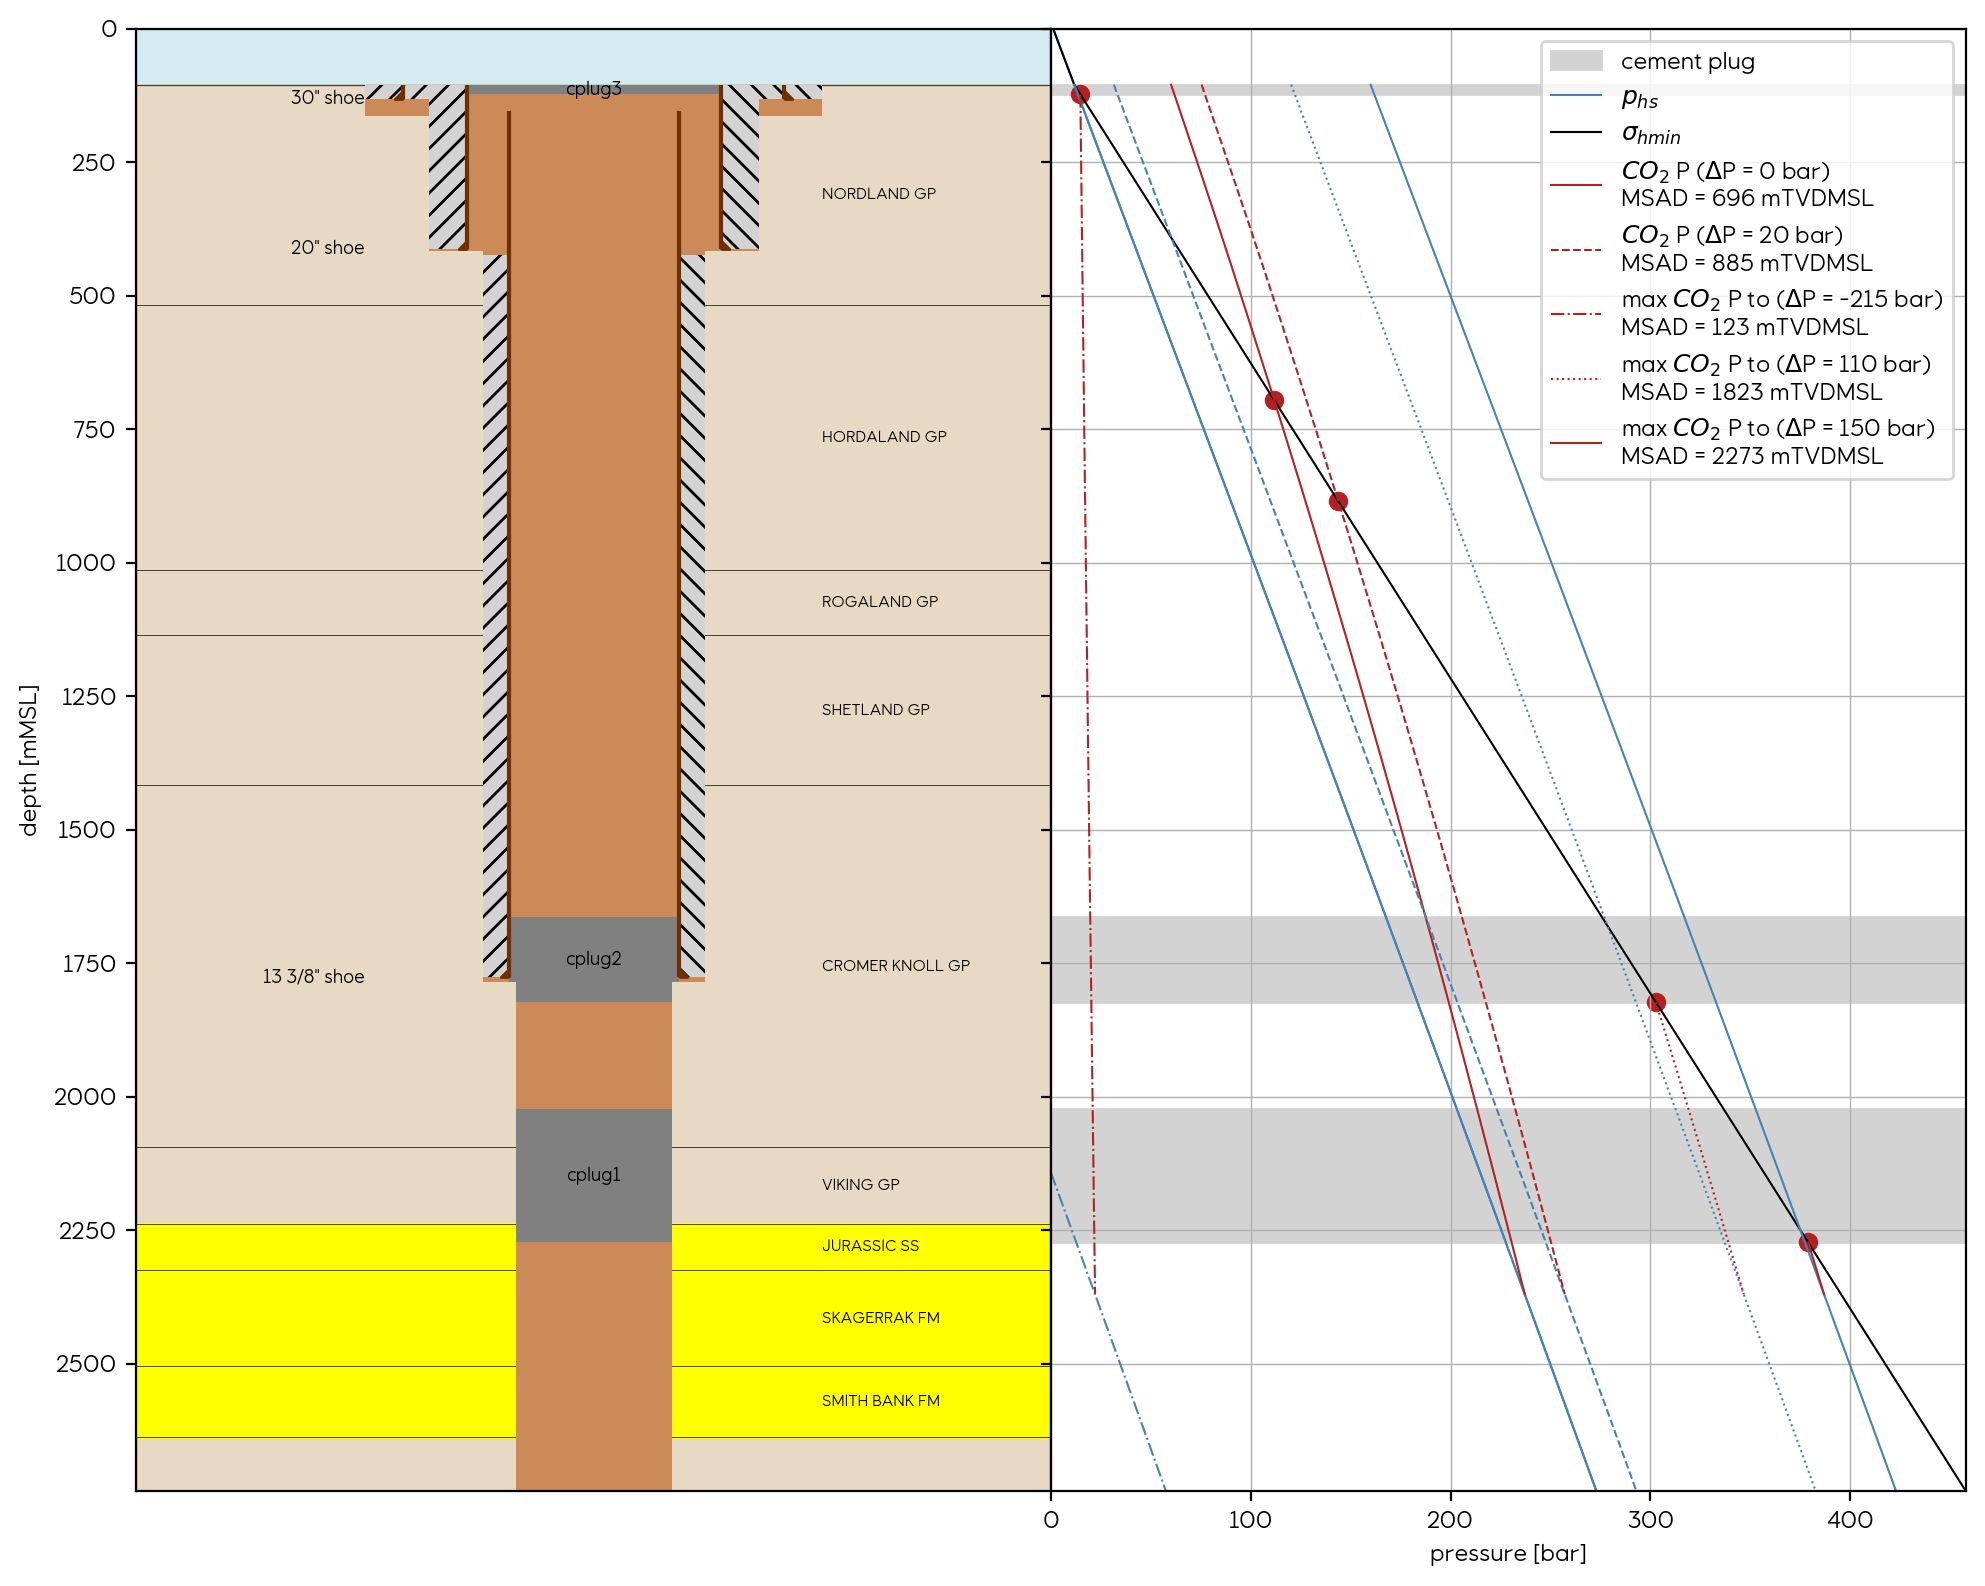

In [26]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_RP=True, #plot reservoir pressure scenarios
              plot_MSAD= True, #plot minimum safety abandonment depth
              plot_maxP=True #plot max expected pressures
              )

fig.tight_layout()
fig.subplots_adjust(wspace=0)


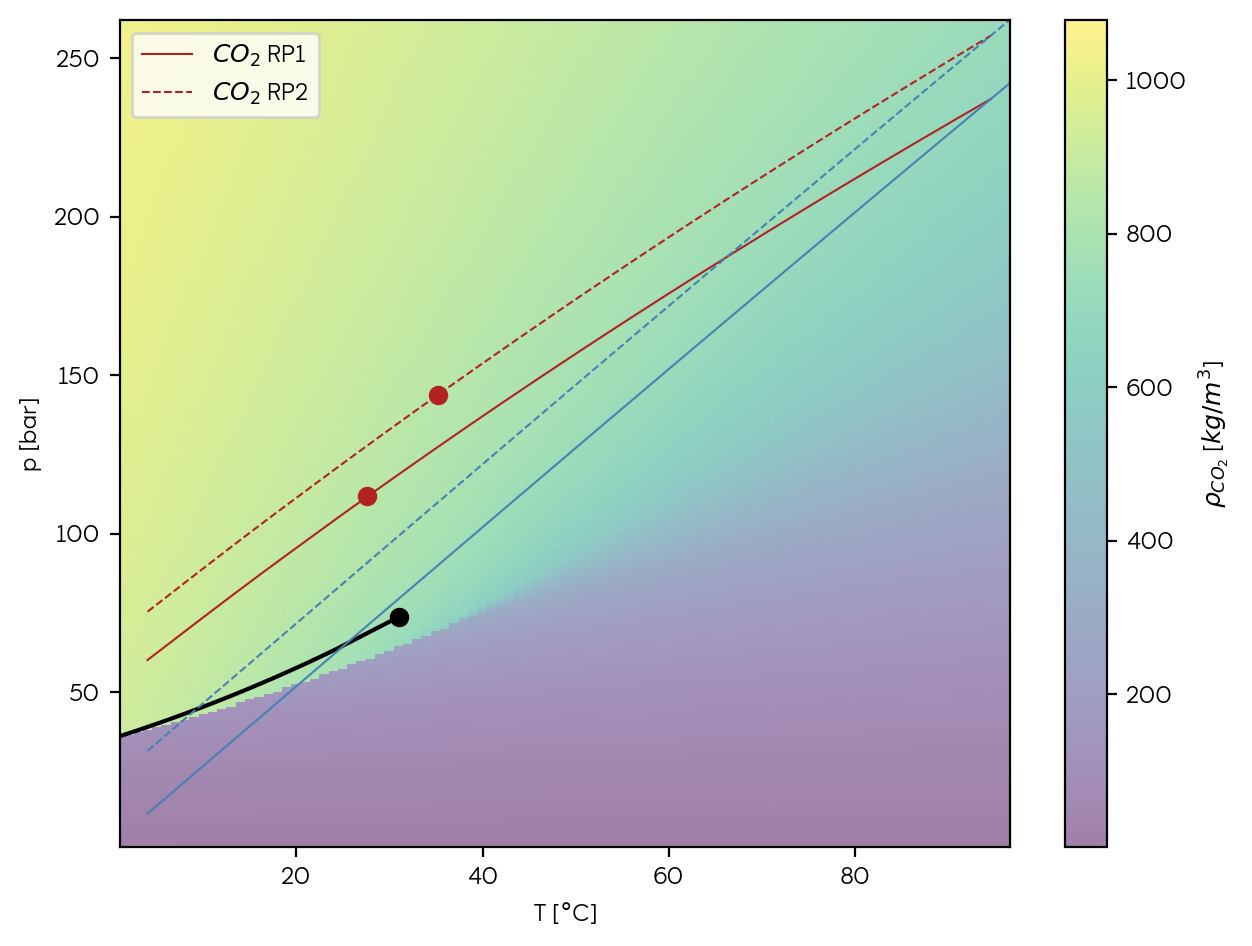

In [27]:
plot_pt(my_pressure, plot_RP=True, plot_maxP=False, plot_MSAD=True)

# CO2 Leakage

In [28]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug1'

In [29]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

barrier_perm:  [0.01, 10.0, 1000.0]


,0.01,10.00,1000.00
RP1,0,0.00908,0.91958
RP2,0,0.01412,1.42342
max_p_cplug3,0,0,0
max_p_cplug2,0,0.03702,3.71348
max_p_cplug1,0,0.0474,4.75125
